In [41]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12.0, 8.0)

%matplotlib inline

In [53]:
cursos = pd.read_csv('201901_cursos.txt', encoding = 'iso-8859-1', delimiter = ';', decimal = ',')
universidades = pd.read_csv('201901_universidades.txt', encoding = 'iso-8859-1', delimiter = ';')


In [54]:
cursos2 = pd.merge(cursos, universidades, on='cod_uni')
print('total de cursos:' ,cursos2['cod_curso'].count())
cursos2.head()

total de cursos: 588


,cod_uni,cod_curso,nombre_curso,nota,nombre_uni
0,1,1,Arqueología,6.828,COMPLUTENSE
1,1,2,Bellas Artes,9.157,COMPLUTENSE
2,1,4,Conservación y Restauración del Patrimonio Cul...,8.042,COMPLUTENSE
3,1,5,Diseño,10.672,COMPLUTENSE
4,1,6,Español: Lengua y Literatura,5.000,COMPLUTENSE


In [44]:
# Eiminar Centros Adscritos
centros_complutense = list(range(150,196))
centros_autonoma =  [271, 238, 233, 234] + list(range(290,296))
centros_politecnica = [340]
centros_alcala = [430] + list(range(490,498)) 
centros_rjc = [844,846,847,888, 889, 897,923,924]
centros_rjc += list(range(750,755)) + list(range(790,797)) + list(range(839,843))
centros_adscritos = centros_complutense + centros_autonoma + centros_politecnica + centros_alcala + centros_rjc

def adscritos(row):
    if row in centros_adscritos: 
        return 1
    else:
        return 0

cursos2['adscrito'] = cursos2['cod_curso'].apply(adscritos)
cursos2 = cursos2[cursos2['adscrito'] == 0]
print('total de cursos tras eliminar centros adscritos:' ,cursos2['cod_curso'].count())

total de cursos tras eliminar centros adscritos: 517


In [46]:
# Obtener la lista de los 20 cursos que exigen más nota
cursos3 = cursos2.sort_values(by=['nota'], ascending=False)
with open('top_notas_corte.txt', 'w') as f:
    print(cursos3[['nombre_uni','nombre_curso','nota']].head(20), file=f)
cursos3[['nombre_uni','nombre_curso','nota']].head(20)

,nombre_uni,nombre_curso,nota
87,COMPLUTENSE,Matemáticas-Física,13.773
336,CARLOS III,Estudios Internacionales y Derecho (bilingue),13.493
334,CARLOS III,Estudios Internacionales y ADE (en inglés),13.216
83,COMPLUTENSE,Ingeniería Informática-Matemáticas,13.211
337,CARLOS III,Estudios Internacionales y Economía (en inglés),13.166
246,ALCALÁ,Lenguas Modernas y Traducción (Guadalajara) + ...,13.127
144,AUTÓNOMA,Medicina,13.124
493,REY JUAN CARLOS,Criminología-Psicología (Alcorcón),13.045
499,REY JUAN CARLOS,Derecho-Relaciones Internacionales (Fuenlabrada),13.026
29,COMPLUTENSE,Medicina,12.966


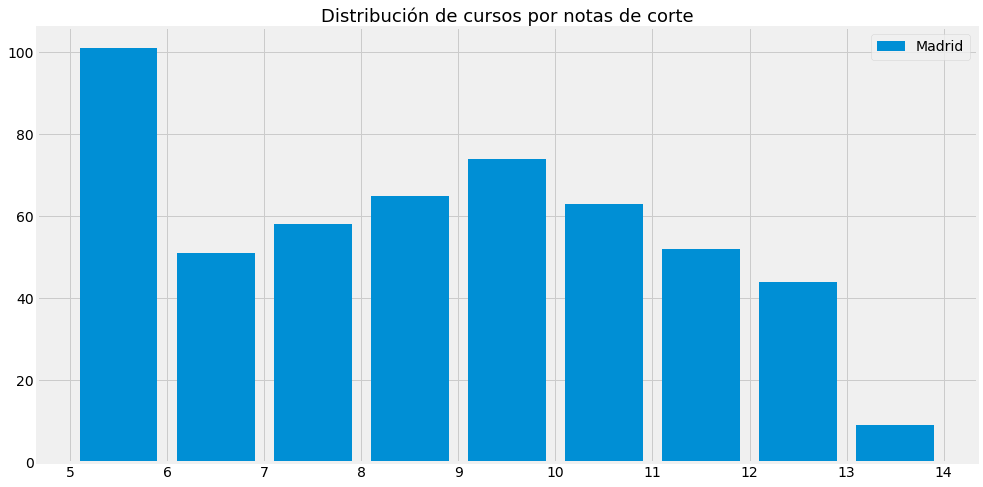

In [47]:
params = {'legend.fontsize': 14,
          'figure.figsize': (15, 8),
         'axes.labelsize': 14,
         'axes.titlesize':14,
         'xtick.labelsize':14,
         'ytick.labelsize':14}
plt.rcParams.update(params)

x = cursos3['nota']
rango = range(5,15)

plt.hist(x, bins = rango, color=sns.color_palette()[0], label='Madrid',rwidth = 0.8)

plt.xticks(rango,rotation = 0)
plt.legend()
plt.title('Distribución de cursos por notas de corte',fontsize= 18)
plt.savefig('images/notas_hist.png', bbox_inches='tight', pad_inches=0.3, dpi=220)
plt.show()

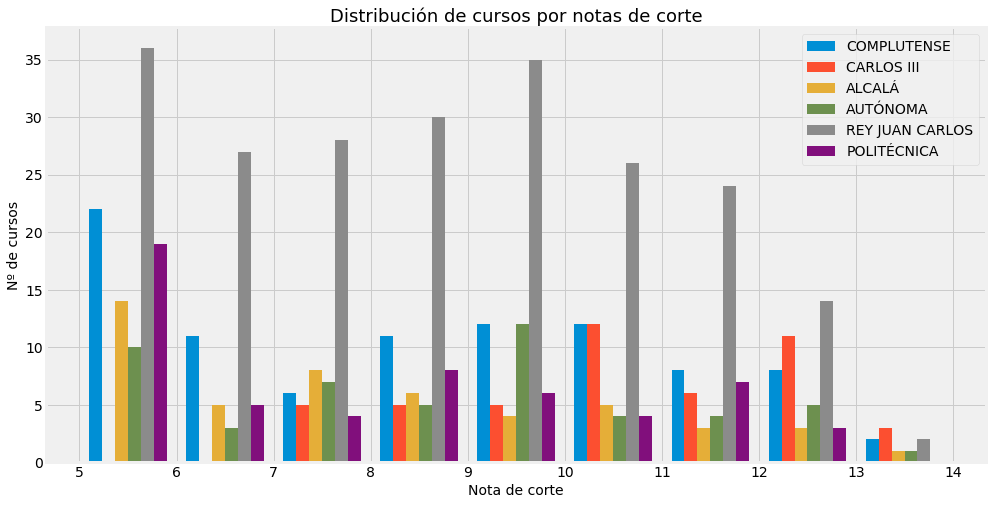

In [48]:
unis = cursos3['nombre_uni'].unique()
i = 0
x= []
colores = []
etiquetas = []

for uni in unis:
    x.append(cursos3[cursos3['nombre_uni'] == uni]['nota'])
    colores.append(sns.color_palette()[i])
    etiquetas.append(uni)
    i +=1

plt.hist(x, bins = rango, color=colores, label=etiquetas)
plt.legend()
plt.xticks(rango,rotation = 0)
plt.title('Distribución de cursos por notas de corte',fontsize= 18)
plt.xlabel('Nota de corte')
plt.ylabel('Nº de cursos')
plt.savefig('images/notas_por_uni1.png', bbox_inches='tight', pad_inches=0.3, dpi=220)
plt.show()

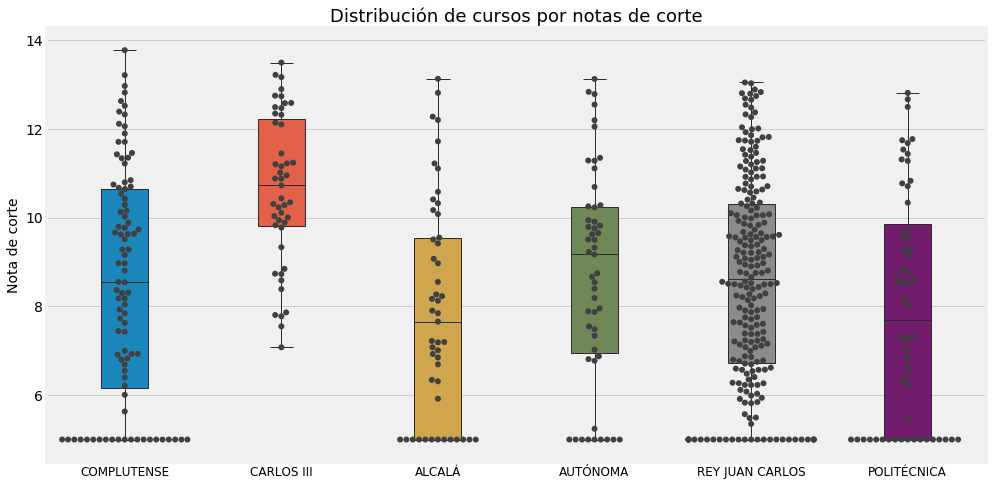

In [50]:
plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.boxplot(x='nombre_uni',y='nota', data=cursos3, linewidth=1,width = 0.3)
sns.swarmplot(x='nombre_uni',y='nota', data=cursos3 ,size = 6, color='0.25')
ax.set_xticklabels(unis, rotation = 0, va='top',fontsize= 12 )
ax.set_ylabel('Nota de corte')    
ax.set_xlabel('')
ax.set_title('Distribución de cursos por notas de corte',fontsize= 18)
plt.savefig('images/notas_por_uni2.png', bbox_inches='tight', pad_inches=0.3, dpi=220)
plt.show()

In [51]:
# Clasificación por carreras
carreras = ('medicina', 'ingeniería', 'matemáticas', 'derecho','farmacia','psicología','filosofía',
            'física','química','farmacia','economía','arquitectura','bio')
def carrera(row):
    row = row.lower()
    for carrera in carreras:
        if row.find(carrera) is not -1: return carrera
    return 'otras'


cursos3['carrera'] = cursos3['nombre_curso'].apply(carrera)
cursos3= cursos3[cursos3['carrera'] != 'otras']

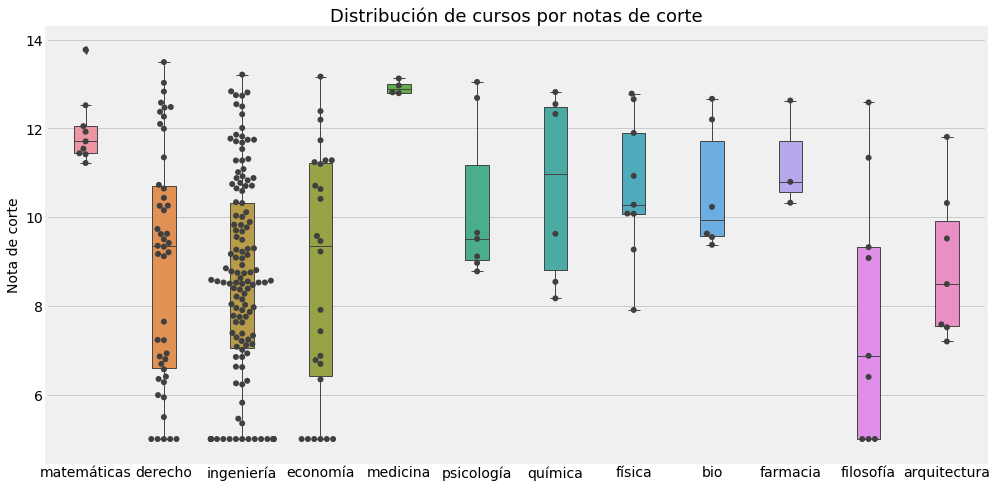

In [52]:
plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.boxplot(x='carrera',y='nota', data=cursos3, linewidth=1,width = 0.3)
sns.swarmplot(x='carrera',y='nota', data=cursos3 ,size = 6, color='0.25')
#ax.set_xticklabels(unis, rotation = 60, va='top',fontsize= 10 )
ax.set_ylabel('Nota de corte')    
ax.set_xlabel('')
ax.set_title('Distribución de cursos por notas de corte',fontsize= 18)
plt.savefig('images/notas_por_carrera.png', bbox_inches='tight', pad_inches=0.3, dpi=220)
plt.show()